# 0. 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

In [3]:
# 데이터 불러오기 및 판다스 데이터프레임 객체에 담기: pd.read_csv()
data = pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/4강_분류 모델/타이타닉/train.csv')# 모델 학습 파일
#test = pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/4강_분류 모델/타이타닉/test.csv')# 모델 시험지 파일
#submission = pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/4강_분류 모델/타이타닉/submission.csv') #답안지 파일 

#2. 점검 및 탐색(EDA)

## 데이터 탐색

In [4]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

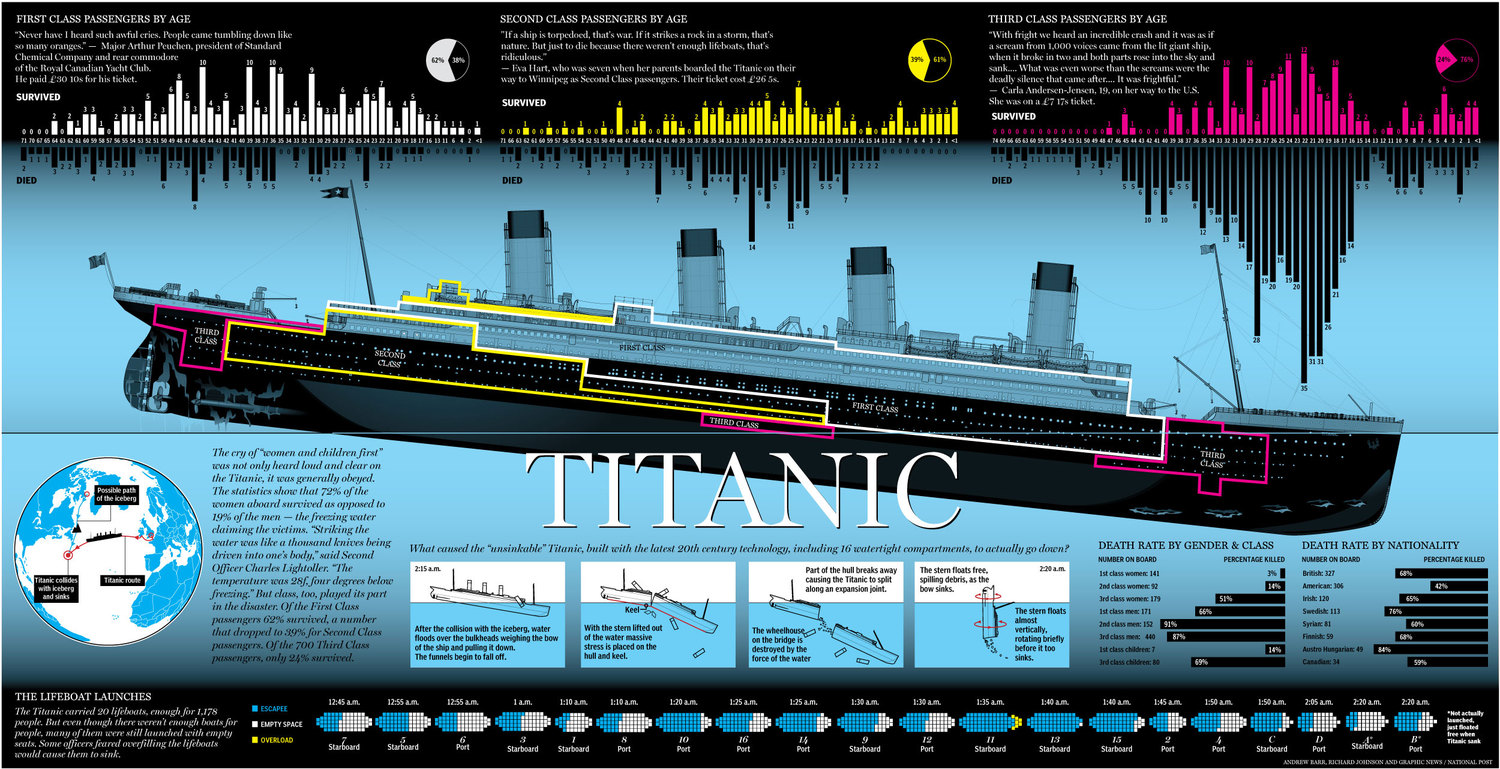

In [ ]:
# 데이터탐색 방법: head(), tail()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#결측치 개수 확인: isnull(),sum()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


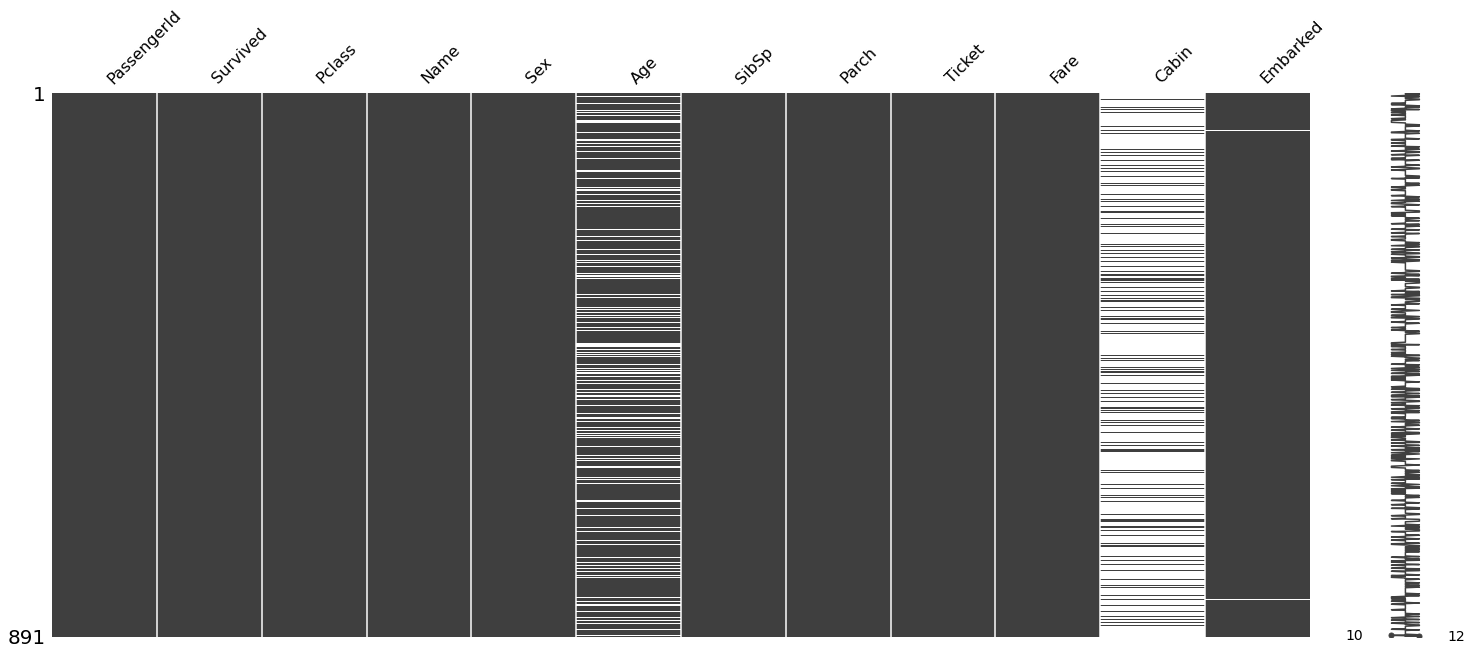

In [9]:
# 결측치 시각화 모듈: missingno - missingno.matrix()
import missingno
missingno.matrix(data)

In [11]:
# 데이터의 통계 자료 확인하기: describe()
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# 특정 칼럼의 데이터 카테고리별 값 세기: value_counts(), 범주형 데이터에 주로 사용
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
data[['Survived','Sex']].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64

In [16]:
# 어려운 버전: groupby + 다른 집계 함수 설명.
data.groupby('Survived')[['Age']].mean()

,Age
Survived,
0,30.626179
1,28.343690


In [17]:
data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


## 시각화

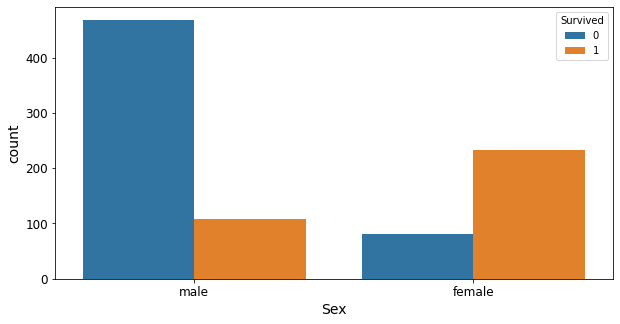

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x="Sex", data=data, hue='Survived')

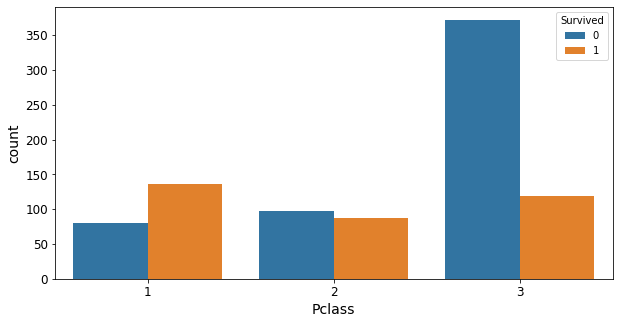

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x="Pclass", data=data, hue='Survived')

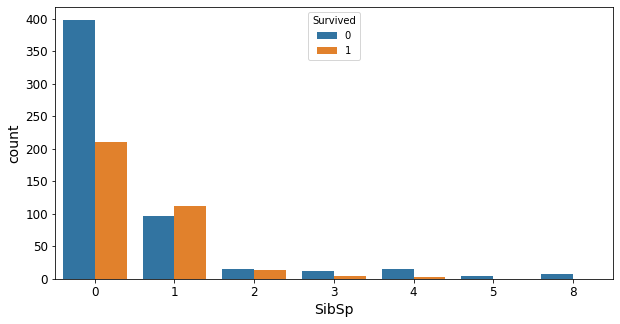

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x="SibSp", data=data, hue='Survived')

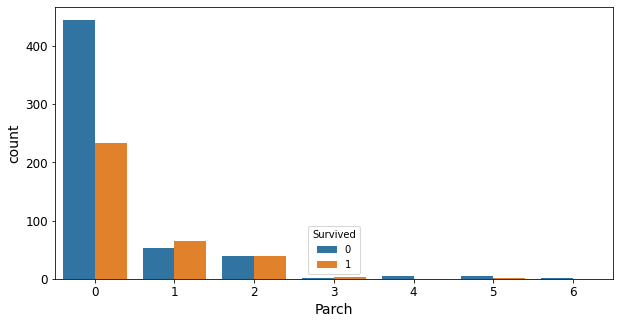

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(x="Parch", data=data, hue='Survived')

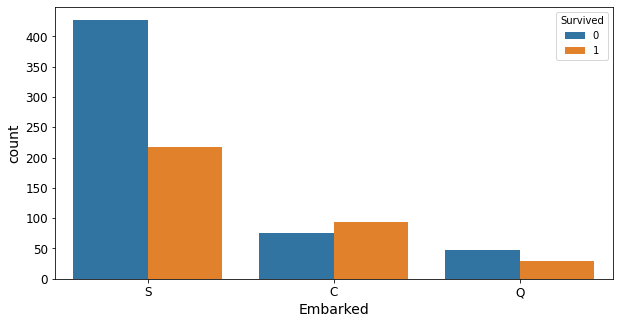

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x="Embarked", data=data, hue='Survived')

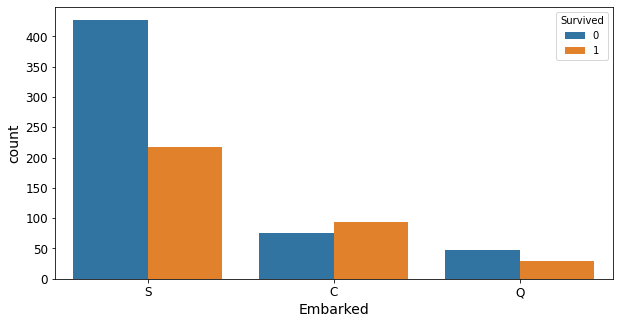

In [25]:
def countploltShow(x): #, hue):
  # 위의 함수 모듈화 하기.
  plt.figure(figsize = (10,5))
  sns.countplot(x=x, data=data, hue='Survived')

countploltShow("Embarked")

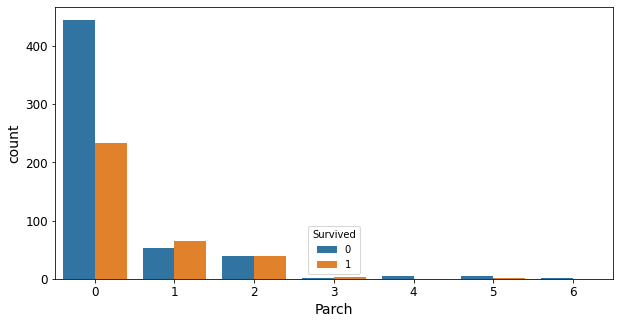

In [26]:
countploltShow("Parch")

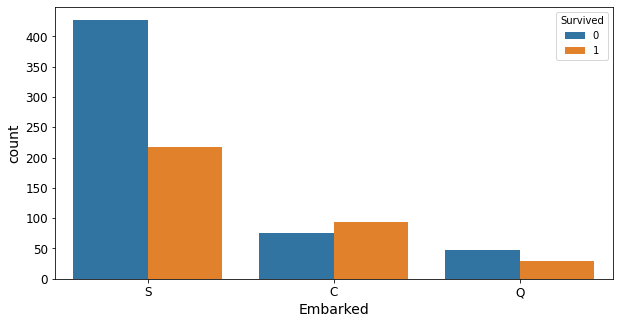

In [28]:
def countploltShow(x = "Embarked", y = 'Survived'):
  # 위의 함수 모듈화 하기.
  plt.figure(figsize = (10,5))
  sns.countplot(x=x, data=data, hue=y)

countploltShow()

In [30]:
def bar_chart(feature):
  survived = data[data['Survived'] == 1][feature].value_counts()
  dead = data[data['Survived'] == 0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind='bar', stacked = True, figsize=(10,5))

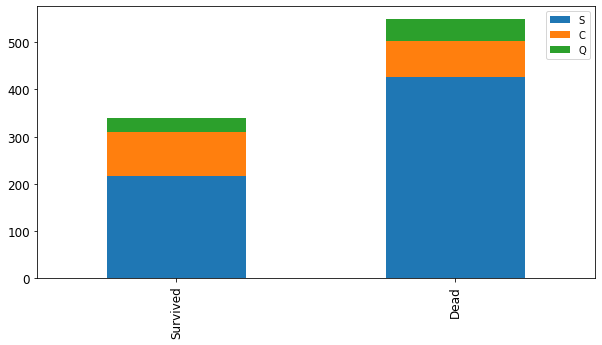

In [31]:
bar_chart("Embarked")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc0a88750>,
      dtype=object)

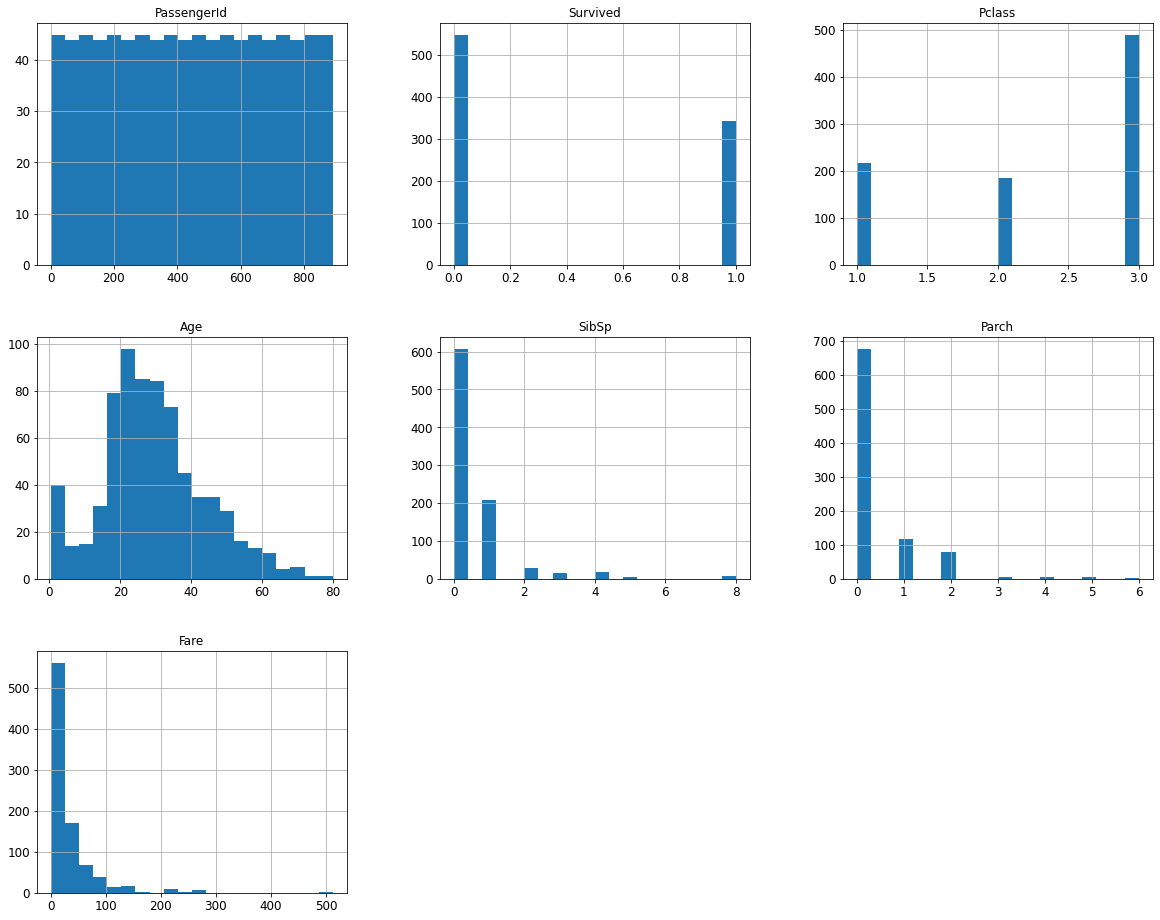

In [32]:
data.hist(bins=20, figsize=(20,16))

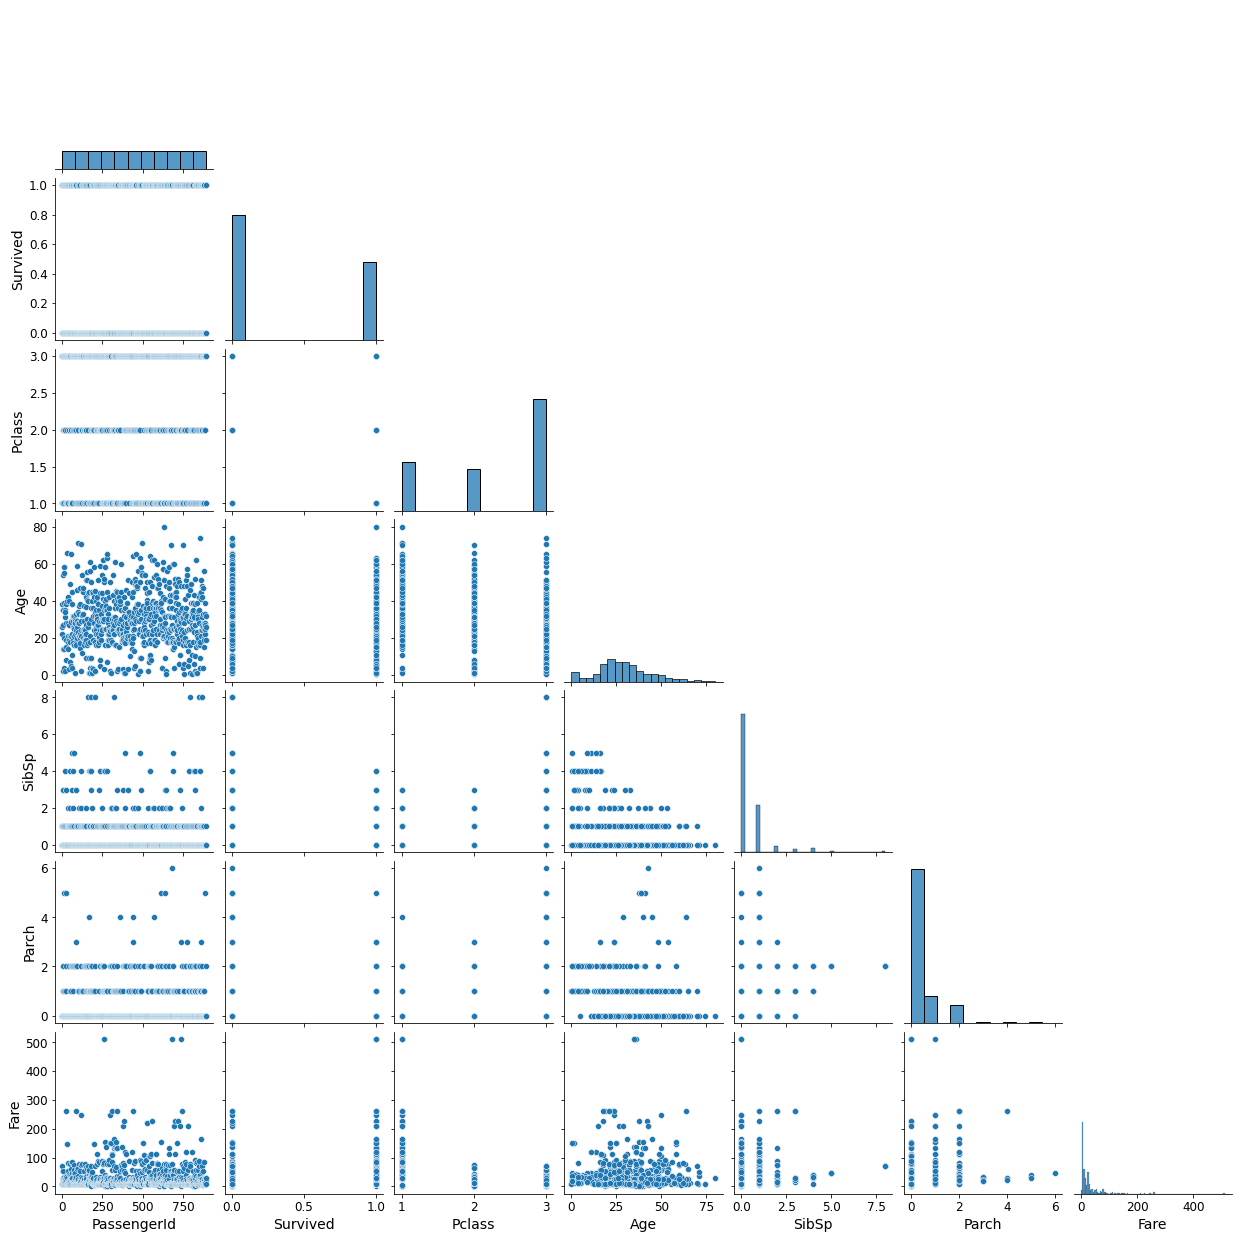

In [33]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때: pairplot(data, corner = True)
sns.pairplot(data, corner = True)

피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [35]:
# 상관분석: .corr()
corr_matrix = data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

**cmap 관련 예제**
- 참고 자료: https://wikidocs.net/141538

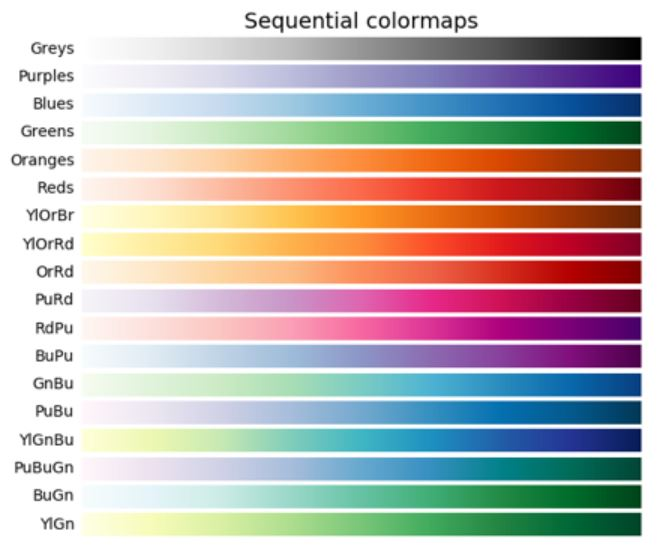

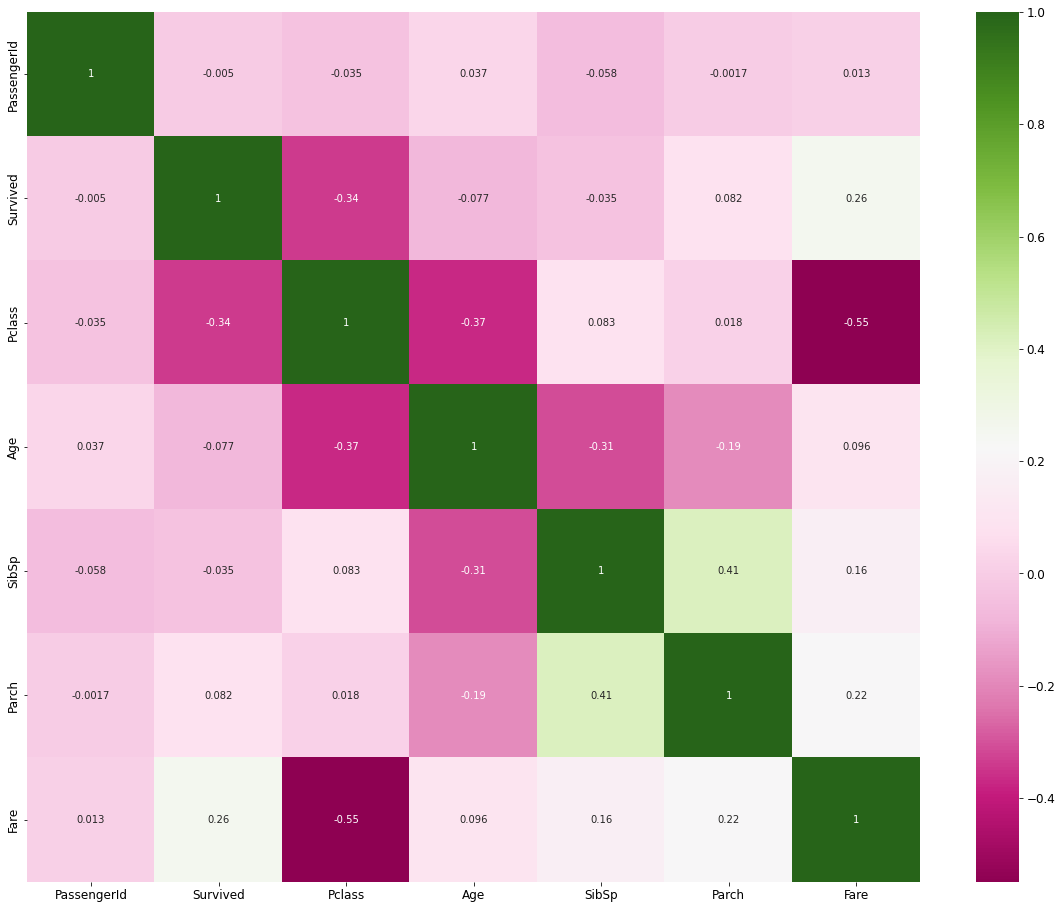

In [37]:
# 상관분석의 시각화: .heatmap(data, annot = True, cmap='color')
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot = True, cmap='PiYG') #,  vmin=-1, vmax=1)

#3. 전처리 및 정제

##Name

In [38]:
data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [39]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [40]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

- Mr: 남성
- Miss: 미혼 여성
- Mrs: 기혼 여성
- Ms: 이혼 여성, 미혼/기혼 밝히고 싶지 않은 여성
- Master: 보통 어린 남자아이들
- Dr: 박사



In [41]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":2, "Dr":3,"Rev":3, "Col":3, "Major":3, "Mlle":3, "Countres":3,
                 "Ms":1, "Lady":1, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}

data['Title'] = data['Title'].map(title_mapping)

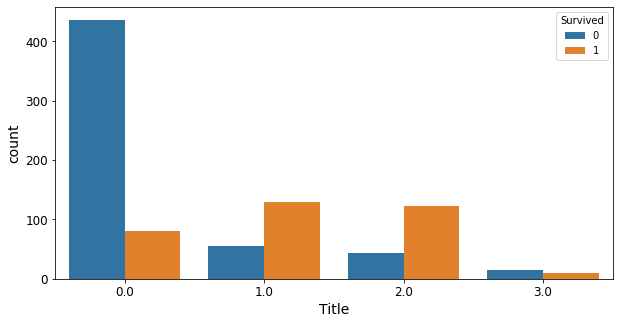

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(x="Title", data=data, hue='Survived')

In [43]:
data["Title"].isnull().sum()

1

In [44]:
data[data["Title"].isnull()]["Name"]

759    Rothes, the Countess. of (Lucy Noel Martha Dye...
Name: Name, dtype: object

In [45]:
#귀부인? 백작부인? 1? 2?
data['Title'].fillna(2, inplace = True)

In [46]:
data[data["Title"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


##Age

In [47]:
data['Age'].isnull().sum()

177

In [ ]:
#transform 각 셀에 함수에 의한 입력값 적용 transform('median')
#train.groupby("Title")["Age"]

In [48]:
data['Age'].fillna(data.groupby("Title")["Age"].transform('median'), inplace = True)

In [49]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

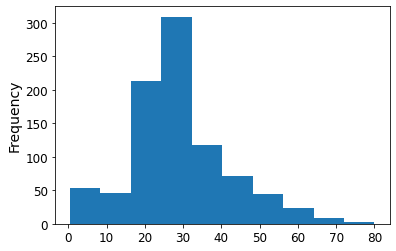

In [50]:
data['Age'].plot(kind = 'hist')

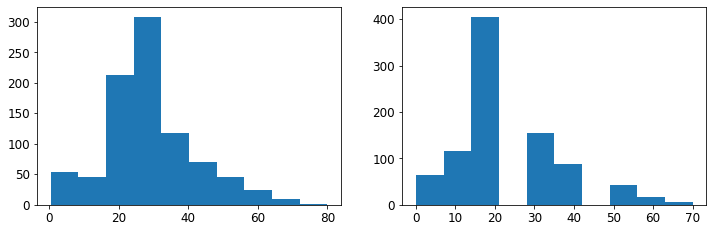

In [51]:
#연속형 데이터를 범주형 데이터로 변경 pd.cut(data["특정 칼럼 이름"], bins=[구간], labels=[bins 구간별 레이블])
data["Age_cat"] = pd.cut(data["Age"], bins=[0., 10, 20, 30, 40, 50, 60, 70, np.Inf],
                         labels=[0, 10, 20, 30, 40, 50, 60, 70])


plt.figure(figsize=(12,8))
plt.subplot(221)
plt.hist(data["Age"])

plt.subplot(222)
plt.hist(data["Age_cat"])
plt.show()

In [52]:
data["Age_cat"] = pd.cut(data["Age"], bins=[0., 10, 20, 30, 40, 50, 60, 70, np.Inf],
                         labels=[0, 10, 20, 30, 40, 50, 60, 70])

In [53]:
# 연속형 데이터 비교:  
data["Age"].value_counts()

30.00    144
21.00     60
29.00     41
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [54]:
# 범주형 데이터 비교:  
data["Age_cat"].value_counts()

20    406
30    155
10    115
40     87
0      64
50     42
60     17
70      5
Name: Age_cat, dtype: int64

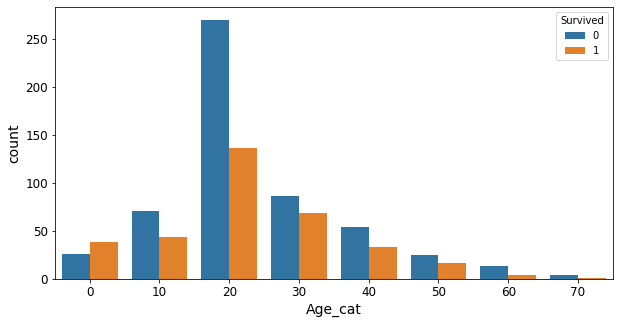

In [55]:
plt.figure(figsize = (10,5))
sns.countplot(x="Age_cat", data=data, hue='Survived')

In [56]:
# 나이대별 생존 비율
data.groupby('Age_cat')["Survived"].value_counts(normalize = True)

Age_cat  Survived
0        1           0.593750
         0           0.406250
10       0           0.617391
         1           0.382609
20       0           0.665025
         1           0.334975
30       0           0.554839
         1           0.445161
40       0           0.620690
         1           0.379310
50       0           0.595238
         1           0.404762
60       0           0.764706
         1           0.235294
70       0           0.800000
         1           0.200000
Name: Survived, dtype: float64

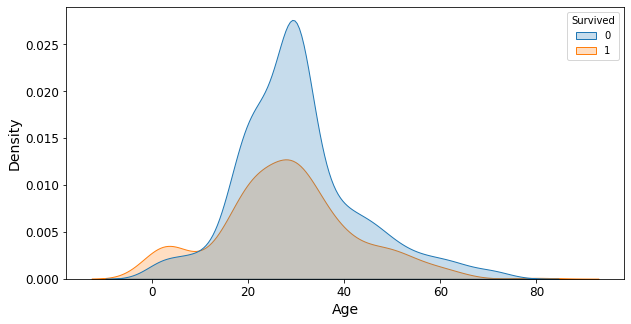

In [57]:
# 밀도함수 vs 히스토그램
plt.figure(figsize = (10,5))
sns.kdeplot(x="Age", data=data, hue='Survived', shade=True)

## Embarked

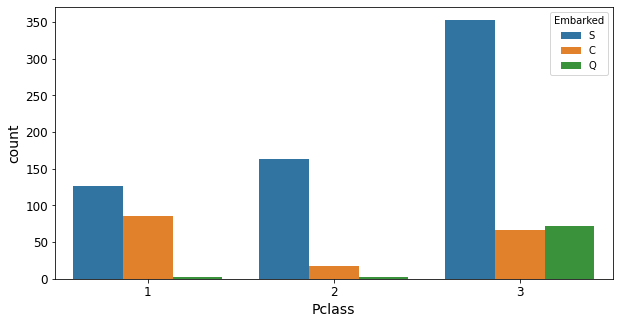

In [58]:
plt.figure(figsize = (10,5))
sns.countplot(x="Pclass", data=data, hue='Embarked')

In [59]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Age_cat          0
dtype: int64

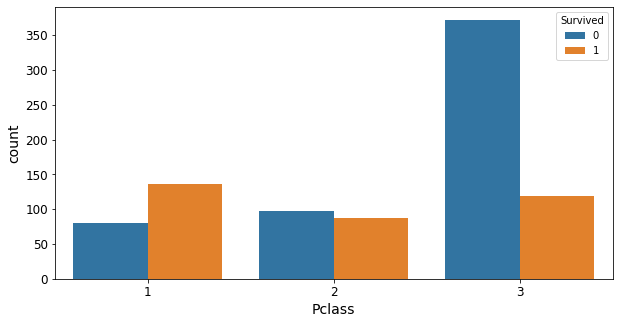

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(x="Pclass", data=data, hue='Survived')

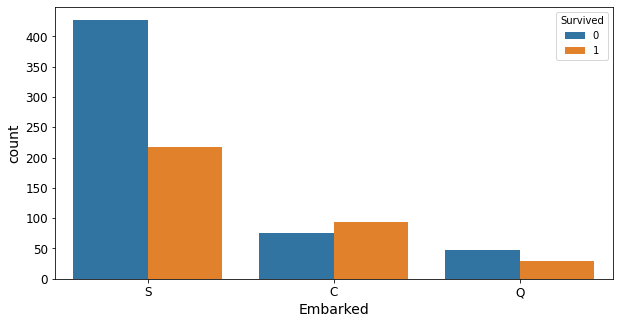

In [61]:
plt.figure(figsize = (10,5))
sns.countplot(x="Embarked", data=data, hue='Survived')

In [62]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cat
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,30
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2.0,60


In [63]:
# 데이터 죽이기
data.dropna(subset=["Embarked"], axis = 0, inplace = True)

In [ ]:
# 데이터 살리기
data["Embarked"].fillna("C", inplace = True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Age_cat          0
dtype: int64

In [64]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Age_cat          0
dtype: int64

##Fare

In [ ]:
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cat


In [ ]:
data[data['Age'] > 60][data['Pclass'] > 2].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    4.122000e+02
Survived       2.000000e-01
Pclass         3.000000e+00
Age            6.670000e+01
SibSp          0.000000e+00
Parch          0.000000e+00
Ticket         7.407387e+26
Fare           7.820000e+00
Cabin                   NaN
Title          4.000000e-01
dtype: float64

In [ ]:
data['Fare'].fillna(7.82, inplace = True)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Age_cat          0
dtype: int64

## SibSp + Parch

In [65]:
data["passengers"] = data["SibSp"] + data["Parch"] + 1

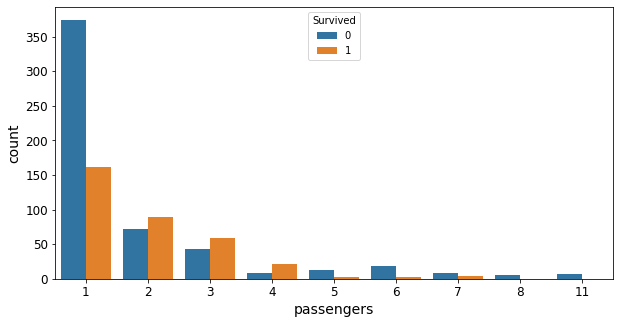

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(x="passengers", data=data, hue='Survived')

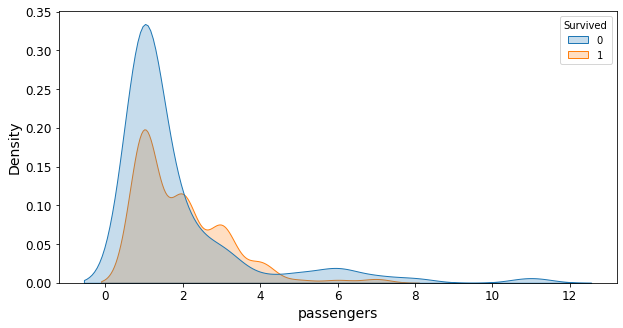

In [67]:
plt.figure(figsize = (10,5))
sns.kdeplot(x="passengers", data=data, hue='Survived', shade=True)

## Cabin

- 객실 번호
- 결측치가 많음
- 널처리할지 해당 컬럼 제외할지 결정 필요

In [68]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 146, dtype: int64

In [69]:
data['Cabin'] = data['Cabin'].str[:1]
data['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 889, dtype: object

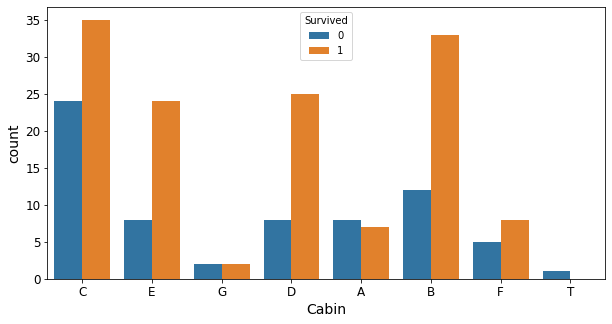

In [70]:
plt.figure(figsize = (10,5))
sns.countplot(x="Cabin", data=data, hue='Survived')

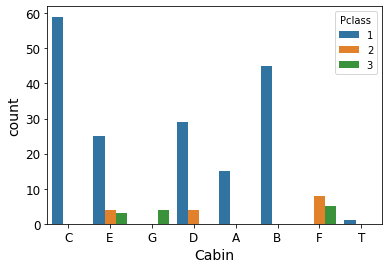

In [71]:
sns.countplot(x="Cabin", data=data, hue='Pclass')

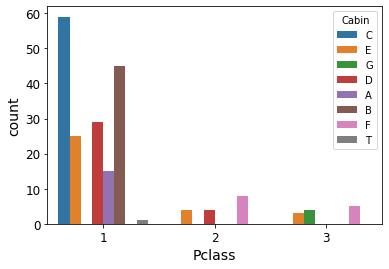

In [72]:
sns.countplot(x="Pclass", data=data, hue='Cabin')

In [73]:
data.drop('Cabin', axis = 1, inplace = True)

## 불필요한 나머지 인자 제거

- 주민번호, ID와 같이 필요 없는 데이터는 삭제
- 재생성된 데이터 삭제

In [74]:
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_cat,passengers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,20,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2.0,30,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,20,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2.0,30,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,30,1


In [75]:
dropCol = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Age_cat']

In [76]:
data.drop(dropCol, axis=1, inplace = True)

In [77]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
passengers    0
dtype: int64

In [ ]:
data[:5]

## Encoder
- 문자열 처리

In [79]:
#OrdinalEncoder vs OnehotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Sex, Embarked

In [80]:
ordinal = OrdinalEncoder() #categories = [['male', 'female']])
Sex_ar = data[['Sex']]
data_num = ordinal.fit_transform(Sex_ar)

In [81]:
# 인코딩된 카테고리의 원본 데이터 확인: categories_
ordinal.categories_

[array(['female', 'male'], dtype=object)]

In [82]:
data['Sex'] = data_num

In [83]:
ordinal_Enbarked = OrdinalEncoder()

Embarked_ar = data[['Embarked']]
data_Emb = ordinal_Enbarked.fit_transform(Embarked_ar)

data['Embarked'] = data_Emb

In [ ]:
# 특징 공학: 데이터 확인 후 칼럼 추가.

In [84]:
# 데이터 변환 => 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data) 

#scaler = MinMaxScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data)

#data = pd.DataFrame(data_scaled, columns=data.feature_names) 

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop("Survived", axis=1), data["Survived"].copy() , test_size=0.2, random_state=42)
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,passengers
708,1,0.0,22.0,151.5500,2.0,1.0,1
240,3,0.0,21.0,14.4542,0.0,1.0,2
382,3,1.0,32.0,7.9250,2.0,0.0,1
792,3,0.0,21.0,69.5500,2.0,1.0,11
683,3,1.0,14.0,46.9000,2.0,0.0,8
...,...,...,...,...,...,...,...
107,3,1.0,30.0,7.7750,2.0,0.0,1
271,3,1.0,25.0,0.0000,2.0,0.0,1
862,1,0.0,48.0,25.9292,2.0,2.0,1
436,3,0.0,21.0,34.3750,2.0,1.0,5


#4. 모델링 및 훈련

In [94]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


np.random.seed(142)

svm_cla = svm.SVC()
svm_cla.fit(X_train, y_train)

log_cla = LogisticRegression()
log_cla.fit(X_train, y_train)

tree_cla = DecisionTreeClassifier()
tree_cla.fit(X_train, y_train)

forest_cla = RandomForestClassifier()
forest_cla.fit(X_train, y_train)

knn_cla = KNeighborsClassifier()
knn_cla.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNeighborsClassifier()

In [87]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("     ：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:
        print('      ：')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib    ，          ，                ，     matplotlib        ，       
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

      ：
[[100   9]
 [ 47  22]]


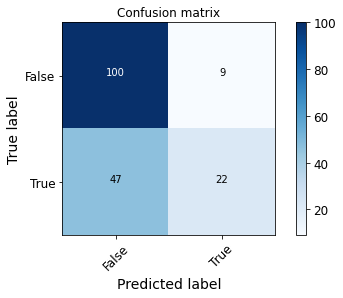

In [95]:
from sklearn.metrics import confusion_matrix

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


def confusionMatrixPrint(model, ModelName):
  data_predictions = model.predict(X_test)
  return confusion_matrix(y_test, data_predictions)

plot_confusion_matrix(confusionMatrixPrint(svm_cla, "SVM"), ['False', 'True'])

      ：
[[86 23]
 [15 54]]


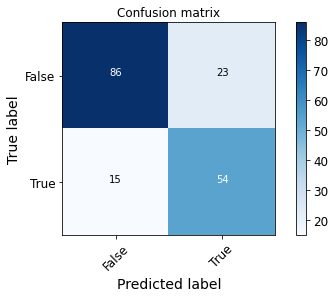

In [96]:
plot_confusion_matrix(confusionMatrixPrint(log_cla, "LogisticRegression"), ['False', 'True'])

      ：
[[78 31]
 [14 55]]


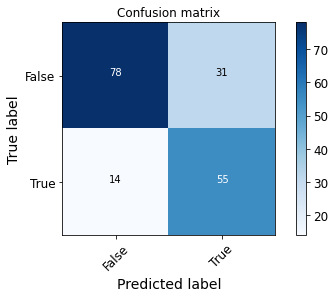

In [97]:
plot_confusion_matrix(confusionMatrixPrint(tree_cla, "DecisionTreeClassifier"), ['False', 'True'])

      ：
[[84 25]
 [17 52]]


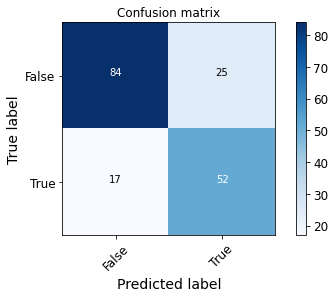

In [98]:
plot_confusion_matrix(confusionMatrixPrint(forest_cla, "RandomForestClassifier"), ['False', 'True'])

      ：
[[86 23]
 [32 37]]


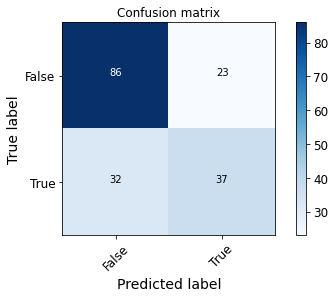

In [100]:
plot_confusion_matrix(confusionMatrixPrint(knn_cla, "KNeighborsClassifier"), ['False', 'True'])

In [ ]:
# MSE, RMSE를 사용한 결과 비교
"""
from sklearn.metrics import mean_squared_error
def MSEPrint(model, ModelName):
  data_predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, data_predictions)
  rmse = np.sqrt(mse)
  print(f"{ModelName} 결과: {rmse}")
"""

'\nfrom sklearn.metrics import mean_squared_error\ndef MSEPrint(model, ModelName):\n  data_predictions = model.predict(X_test)\n  mse = mean_squared_error(y_test, data_predictions)\n  rmse = np.sqrt(mse)\n  print(f"{ModelName} 결과: {rmse}")\n'

In [103]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_cla, X_train, y_train,
                                scoring="accuracy", cv=10)
print(forest_scores)

[0.79166667 0.8028169  0.76056338 0.90140845 0.78873239 0.85915493
 0.83098592 0.84507042 0.81690141 0.81690141]


In [105]:
forest_scores2 = cross_val_score(log_cla, X_train, y_train,
                                scoring="accuracy", cv=10)
print(forest_scores2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.80555556 0.84507042 0.81690141 0.85915493 0.78873239 0.84507042
 0.77464789 0.83098592 0.77464789 0.81690141]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [106]:
# Grid Search의 경우 모델의 하이퍼 파라미터가 무엇이 있는지부터 조사 필요.
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_cla = RandomForestClassifier(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_cla, param_grid, cv=5,
                           scoring="accuracy",
                           return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [107]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045911,0.011825,0.018488,0.007380,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.783217,0.823944,...,0.786221,0.021121,15,0.943662,0.947276,0.952548,0.952548,0.964851,0.952177,0.007175
1,0.081985,0.022773,0.014704,0.006660,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.825175,0.823944,...,0.814331,0.013983,7,0.964789,0.968366,0.970123,0.973638,0.975395,0.970462,0.003772
2,0.067664,0.022671,0.006472,0.000414,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.797203,0.816901,...,0.815779,0.011656,6,0.985915,0.985940,0.987698,0.984183,0.980668,0.984881,0.002382
3,0.009814,0.001368,0.003212,0.000755,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.804196,0.845070,...,0.819994,0.016148,3,0.943662,0.942004,0.938489,0.963093,0.957821,0.949014,0.009637
4,0.022198,0.001794,0.003776,0.000053,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.797203,0.838028,...,0.821412,0.017752,2,0.971831,0.971880,0.971880,0.975395,0.973638,0.972925,0.001414
5,0.056648,0.001303,0.006434,0.000313,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.804196,0.823944,...,0.819994,0.007899,3,0.987676,0.982425,0.985940,0.984183,0.982425,0.984530,0.002043
6,0.009145,0.000199,0.002867,0.000101,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.769231,0.859155,...,0.800325,0.031037,13,0.947183,0.949033,0.954306,0.963093,0.966608,0.956045,0.007642
7,0.023930,0.001288,0.003773,0.000176,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.790210,0.838028,...,0.824239,0.018880,1,0.973592,0.966608,0.970123,0.977153,0.975395,0.972574,0.003783
8,0.064159,0.003676,0.007127,0.001499,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",0.783217,0.845070,...,0.817207,0.021790,5,0.985915,0.984183,0.985940,0.984183,0.980668,0.984178,0.001921
9,0.005757,0.001295,0.000000,0.000000,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",NaN,NaN,...,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# 가장 성능이 좋은 모델의 파라미터
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [109]:
#가장 성능이 좋은 모델
estimator = grid_search.best_estimator_

In [110]:
data_predictions = estimator.predict(X_test)

      ：
[[90 19]
 [19 50]]


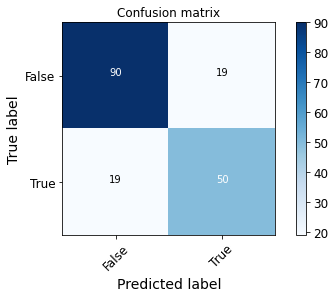

In [111]:
plot_confusion_matrix(confusionMatrixPrint(estimator, "best model"), ['False', 'True'])

## 파이프 라인 구축

In [112]:
data = pd.read_csv('/content/drive/MyDrive/06. DX 캠프 코드/4강_분류 모델/타이타닉/train.csv')

In [113]:
data.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1 , inplace = True)

In [114]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [115]:
data.dropna(subset=["Embarked"], axis = 0, inplace = True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split( data.drop("Survived", axis=1), data["Survived"].copy() , test_size=0.2, random_state=42)
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,"Cleaver, Miss. Alice",female,22.0,0,0,151.5500,S
240,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
382,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S
792,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.5500,S
683,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,46.9000,S
...,...,...,...,...,...,...,...,...
107,3,"Moss, Mr. Albert Johan",male,NaN,0,0,7.7750,S
271,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0000,S
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,25.9292,S
436,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,34.3750,S


In [117]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# 참고 블로그: https://databuzz-team.github.io/2018/11/11/make_pipeline/
# 칼럼별 전처리를 위한 데이터 칼럼 선택 클래스
"""
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
"""

'\nfrom sklearn.base import BaseEstimator, TransformerMixin\n\n# 수치형 열과 범주형 열을 선택하기 위한 클래스\nclass DataFrameSelector(BaseEstimator, TransformerMixin):\n    def __init__(self, attribute_names):\n        self.attribute_names = attribute_names\n    def fit(self, X, y=None):\n        return self\n    def transform(self, X):\n        return X[self.attribute_names].values\n'

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

class FamilyFeatureEngeering(BaseEstimator, TransformerMixin):
    #def __init__(self, parameter): # *args 또는 **kargs 없음
    #    self.parameter = parameter
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        X["Family"] = X["SibSp"] + X["Parch"] + 1
        X.drop(["SibSp", "Parch"], axis = 1, inplace = True)
        return X

FE = FamilyFeatureEngeering()
data = FE.transform(data)

In [119]:
class Age_Name_FeatureEngeering(BaseEstimator, TransformerMixin):
    #def __init__(self, parameter): # *args 또는 **kargs 없음
    #    self.parameter = parameter
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
        title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":2, "Dr":3,"Rev":3, "Col":3, "Major":3, "Mlle":3, "Countres":3,
                 "Ms":1, "Lady":1, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}

        X['Title'] = X['Title'].map(title_mapping)
        X["Title"].fillna(2, inplace = True)
        X.drop("Name", axis = 1, inplace = True)
        X['Age'].fillna(X.groupby("Title")["Age"].transform('median'), inplace = True)
        return X

In [120]:
class FamilyFeatureEngeering(BaseEstimator, TransformerMixin):
    #def __init__(self, parameter): # *args 또는 **kargs 없음
    #    self.parameter = parameter
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        X["Family"] = X["SibSp"] + X["Parch"] + 1
        X.drop(["SibSp", "Parch"], axis = 1, inplace = True)
        return X


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked',
       'Family'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Pclass','Age', 'Fare']
age_attribs = ["Age", "Name"]
family_attribs = ["SibSp","Parch"]
sex_attribs = ["Sex"]
Embarked_attribs = ["Embarked"]

full_pipeline = ColumnTransformer([
        ("num", pipeline, num_attribs),
        ("family", FamilyFeatureEngeering(), family_attribs),
        ("age", Age_Name_FeatureEngeering(), age_attribs),
        ("onehot1", OneHotEncoder(), sex_attribs),
        ("onehot2", OneHotEncoder(), Embarked_attribs),
    ])

X_train_pipe = full_pipeline.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_pipe)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.584104,-0.580194,2.430597,1.0,22.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.812275,-0.084960,-0.358135,2.0,22.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.812275,0.181705,-0.490949,1.0,32.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.812275,-0.084960,0.762595,11.0,22.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.812275,-1.189714,0.301860,8.0,14.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
706,0.812275,-0.084960,-0.494000,1.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0
707,0.812275,-0.351625,-0.652155,1.0,25.0,0.0,0.0,1.0,0.0,0.0,1.0
708,-1.584104,1.400744,-0.124717,1.0,48.0,2.0,1.0,0.0,0.0,0.0,1.0
709,0.812275,-0.656384,0.047083,5.0,21.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
pd.DataFrame(X_train_pipe).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        #("columnsDrop", nullColumnsDrop)
        ("model", RandomForestClassifier())
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

#6. 배포

In [ ]:
#my_model = model or piplineModel

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF